In [1]:
import datasets 
import matplotlib.pyplot as plt
import mpl_lego as mplego
import numpy as np
import simpledorff
import pandas as pd
import pickle

from mpl_lego.colorbar import append_colorbar_to_axis
from mpl_lego.labels import bold_text
from hate_measure.keys import items, item_labels
from hate_measure.utils import recode_responses
from scipy.stats import bootstrap

%matplotlib inline

In [2]:
mplego.style.use_latex_style()

In [4]:
n_items = len(item_labels)

In [5]:
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')   
data = dataset['train'].to_pandas()

Using custom data configuration ucberkeley-dlab--measuring-hate-speech-7cb9b0b8e4d0e1dd
Reusing dataset parquet (/Users/psachdeva/.cache/huggingface/datasets/parquet/ucberkeley-dlab--measuring-hate-speech-7cb9b0b8e4d0e1dd/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901)


  0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
with open("krippendorff_items_recoded.pkl", "wb") as file:
    pickle.dump(bootstraps, file)

PicklingError: Can't pickle <class 'types.BootstrapResult'>: attribute lookup BootstrapResult on types failed

In [10]:
yerr_low = np.array([bootstrap.confidence_interval.low for bootstrap in bootstraps])
yerr_high = np.array([bootstrap.confidence_interval.high for bootstrap in bootstraps])
ymean = (yerr_low + yerr_high) / 2
yerr = np.vstack((ymean - yerr_low, yerr_high - ymean))

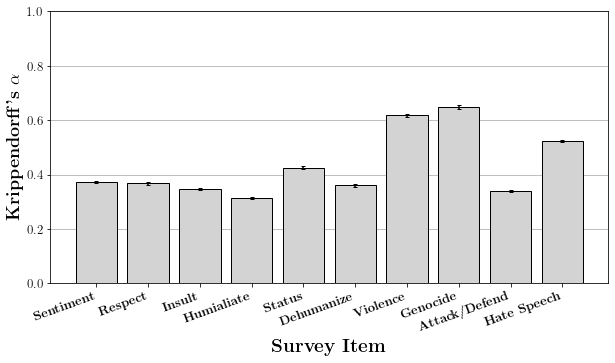

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.bar(x=np.arange(n_items),
       height=ymean,
       yerr=yerr,
       color='lightgray',
       edgecolor='black',
       error_kw={'capsize': 2})

ax.set_xticks(np.arange(n_items))
ax.set_xticklabels(bold_text(item_labels), ha='right', rotation=20)
ax.set_ylim([0, 1])
ax.tick_params(labelsize=13)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_xlabel(bold_text("Survey Item"), fontsize=19)
ax.set_ylabel(bold_text(r"Krippendorff's $\alpha$"), fontsize=18)
plt.savefig('figure2.pdf', bbox_inches='tight')